# Data Exploring

---

In [11]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from pathlib import Path
import re
import typing
import matplotlib.pyplot as plt
import geopy
from geopy.geocoders import Nominatim
import geopandas as gpd
from pyproj import Proj, transform
import shapefile
import rasterio
import rasterio.features
import rasterio.warp
from rasterio.plot import show
from rasterio.windows import Window
from arcgis.gis import GIS

---

## PyShp

- NULL = 0
- POINT = 1
- POLYLINE = 3
- POLYGON = 5
- MULTIPOINT = 8
- POINTZ = 11
- POLYLINEZ = 13
- POLYGONZ = 15
- MULTIPOINTZ = 18
- POINTM = 21
- POLYLINEM = 23
- POLYGONM = 25
- MULTIPOINTM = 28
- MULTIPATCH = 31

In [29]:
sf = shapefile.Reader("./Data/DHMVIIDSMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01")

In [3]:
sf2 = shapefile.Reader("./Data/DHMVIIDSMRAS1m_k02/DHMVII_vdc_k02/DHMVII_vdc_k02")

In [4]:
sf3 = shapefile.Reader("./Data/DHMVIIDSMRAS1m_k03/DHMVII_vdc_k03/DHMVII_vdc_k03")

In [5]:
len(sf)

3

In [6]:
len(sf2)

7

In [7]:
len(sf3)

5

In [30]:
print(sf)

shapefile Reader
    3 shapes (type 'POLYGONZ')
    3 records (4 fields)


In [9]:
print(sf2)

shapefile Reader
    7 shapes (type 'POLYGON')
    7 records (4 fields)


In [10]:
print(sf3)

shapefile Reader
    5 shapes (type 'POLYGONZ')
    5 records (4 fields)


In [11]:
# the lower left (x,y) coordinate and upper right corner 

sf.bbox

[144900.0, 237758.6700000018, 162100.0300195366, 247224.38999511302]

In [12]:
type(sf.bbox)

shapefile._Array

In [13]:
sf2.bbox

[162000.0001220703, 238000.0001220703, 194000.0001220703, 250000.0001220703]

In [14]:
sf3.bbox

[193999.9999999993, 238000.00000000477, 206000.00000000017, 248000.00000000015]

In [15]:
xmin = sf.bbox[0]
ymin = sf.bbox[1]
xmax = sf.bbox[2]
ymax = sf.bbox[3]

In [16]:
shapes = sf.shape()

In [17]:
type(shapes)

shapefile.Shape

In [18]:
shapes2 = sf2.shape()

In [19]:
shapes3 = sf3.shape()

In [20]:
# The shape's index position in the original shapefile 

shapes.oid

0

In [21]:
shapes3.shapeType

15

In [22]:
shapes2.shapeType

5

In [23]:
shapes.shapeType

15

In [24]:
# If the shape record has multiple parts this attribute contains the index of the first point of each part.
# If there is only one part then a list containing 0 is returned 

shapes.parts

[0, 3344]

In [25]:
shapes2.parts

[0, 1288, 1609]

In [26]:
shapes3.parts

[0]

In [27]:
# contains a list of tuples containing an (x,y) coordinate for each point in the shape 

max(shapes.points)

(162100.0300195366, 246282.12998290733)

In [28]:
min(shapes2.points)

(162000.0001220703, 245951.89288330078)

In [29]:
len(shapes.points)

6268

In [30]:
len(shapes2.points)

1886

In [31]:
len(shapes3.points)

353

In [32]:
fields = sf.fields

In [33]:
fields2 = sf2.fields

In [34]:
fields3 = sf3.fields

In [35]:
fields

[('DeletionFlag', 'C', 1, 0),
 ['Id', 'N', 6, 0],
 ['OpnDatum1', 'D', 8, 0],
 ['OpnDatum2', 'D', 8, 0]]

In [36]:
fields2

[('DeletionFlag', 'C', 1, 0),
 ['Date', 'C', 254, 0],
 ['OpnDatum1', 'D', 8, 0],
 ['OpnDatum2', 'D', 8, 0]]

In [37]:
fields3

[('DeletionFlag', 'C', 1, 0),
 ['Date', 'C', 254, 0],
 ['OpnDatum1', 'D', 8, 0],
 ['OpnDatum2', 'D', 8, 0]]

In [38]:
records = sf.records()

In [39]:
records2 = sf2.records()

In [40]:
records3 = sf3.records()

In [41]:
len(records)

3

In [42]:
records

[Record #0: [0, datetime.date(2013, 2, 20), None],
 Record #1: [0, datetime.date(2013, 4, 1), None],
 Record #2: [0, datetime.date(2013, 2, 20), datetime.date(2013, 4, 1)]]

In [43]:
records2

[Record #0: ['20140129', datetime.date(2014, 1, 29), None],
 Record #1: ['20140130', datetime.date(2014, 1, 29), datetime.date(2014, 1, 30)],
 Record #2: ['20140130', datetime.date(2014, 1, 30), None],
 Record #3: ['20140131', datetime.date(2014, 1, 30), datetime.date(2014, 1, 31)],
 Record #4: ['20140131', datetime.date(2014, 1, 31), None],
 Record #5: ['20140202', datetime.date(2014, 1, 31), datetime.date(2014, 2, 2)],
 Record #6: ['20140202', datetime.date(2014, 2, 2), None]]

In [44]:
records3

[Record #0: ['20141121', datetime.date(2014, 11, 21), None],
 Record #1: ['20141124', datetime.date(2014, 11, 24), None],
 Record #2: ['20141125', datetime.date(2014, 11, 25), None],
 Record #3: ['20141121', datetime.date(2014, 11, 21), datetime.date(2014, 11, 24)],
 Record #4: ['20141125', datetime.date(2014, 11, 24), datetime.date(2015, 11, 25)]]

In [45]:
shapeRecs = sf.shapeRecords()

In [46]:
shapeRecs2 = sf2.shapeRecords()

In [47]:
print(shapeRecs)

ShapeRecords: [<shapefile.ShapeRecord object at 0x7fb1a04a1250>, <shapefile.ShapeRecord object at 0x7fb1a383ad00>, <shapefile.ShapeRecord object at 0x7fb1a0546d00>]


---

## Rasterio

In [2]:
dataset = rasterio.open("./Data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif")

In [3]:
type(dataset)

rasterio.io.DatasetReader

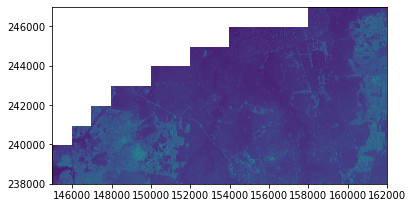

<AxesSubplot:>

In [4]:
show(dataset)

In [5]:
dataset2 = rasterio.open("./Data/DHMVIIDSMRAS1m_k02/GeoTIFF/DHMVIIDSMRAS1m_k02.tif")

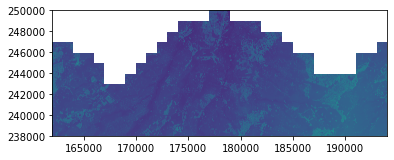

<AxesSubplot:>

In [6]:
show(dataset2)

In [7]:
dataset.name

'./Data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif'

In [8]:
dataset2.name

'./Data/DHMVIIDSMRAS1m_k02/GeoTIFF/DHMVIIDSMRAS1m_k02.tif'

In [9]:
# Dataset objects have bands and this one has a band count of 1

dataset.count

1

In [10]:
dataset2.count

1

In [11]:
# A dataset band is an array of values
# All band arrays of a dataset have the same number of rows and columns
# width = columns 

dataset.width

17000

In [12]:
dataset2.width

32000

In [13]:
# height = rows 

dataset.height

9000

In [14]:
dataset2.height

12000

In [15]:
# Apply a dictionary comprehension to the zip() product of a dataset’s indexes and dtypes attributes
# to get a mapping of band indexes to variable data types 

{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'float32'}

In [16]:
dataset.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [17]:
dataset2.bounds

BoundingBox(left=162000.0, bottom=238000.0, right=194000.0, top=250000.0)

In [18]:
meters_wide = dataset.bounds[2] - dataset.bounds[0]
meters_high = dataset.bounds[3] - dataset.bounds[1]

In [19]:
print(f"{meters_wide} meters wide")
print(f"{meters_high} meters high")

17000.0 meters wide
9000.0 meters high


In [20]:
dataset.transform # * (0, 0)

Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)

In [21]:
# These coordinate values are relative to the origin of the dataset’s Coordinate Reference System (CRS)

dataset.crs

CRS.from_epsg(31370)

#### **EPSG 31370** refers to *Belgian Lambert 72 -- Belgium*

#### Ref. URL: https://epsg.io/31370

In [22]:
dataset.indexes

(1,)

In [23]:
dataset.read()

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.695e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,
          1.688e+01,  1.691e+01]]], dtype=float32)

In [24]:
band1 = dataset.read(1)

In [25]:
band2 = dataset2.read(1)

In [26]:
type(band1)

numpy.ndarray

In [27]:
band1.shape

(9000, 17000)

In [28]:
band1

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,  1.279e+01,
         1.280e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,  1.281e+01,
         1.284e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,  1.283e+01,
         1.288e+01],
       ...,
       [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,  1.693e+01,
         1.690e+01],
       [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,  1.691e+01,
         1.695e+01],
       [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,  1.688e+01,
         1.691e+01]], dtype=float32)

In [29]:
band1[5000]

array([-9999.  , -9999.  , -9999.  , ...,    34.77,    26.91,    34.86],
      dtype=float32)

In [30]:
dataset.bounds.left

145000.0

To get the value for the pixel 10 kilometers east and 5 kilometers south of the dataset’s upper left corner, do the following:

In [31]:
x, y = (dataset.bounds.left + 10000, dataset.bounds.top - 5000)

In [32]:
row, col = dataset.index(x, y)

In [33]:
row, col

(5000, 10000)

In [34]:
band1[row, col]

25.95

In [35]:
# To get the spatial coordinates of a pixel, use the dataset’s xy() method. 
# Ex.: the coordinates of the center of the image can be computed like this:

dataset.xy(dataset.height // 2, dataset.width // 2)

(153500.5, 242499.5)

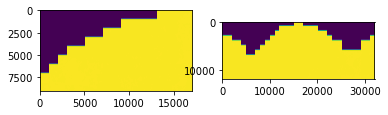

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(band1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(band2)

In [37]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 17000,
 'height': 9000,
 'count': 1,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(1.0, 0.0, 145000.0,
        0.0, -1.0, 247000.0)}

In [38]:
dataset2.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 32000,
 'height': 12000,
 'count': 1,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(1.0, 0.0, 162000.0,
        0.0, -1.0, 250000.0)}

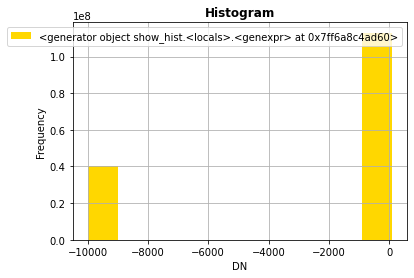

In [39]:
rasterio.plot.show_hist(band1, bins=10)

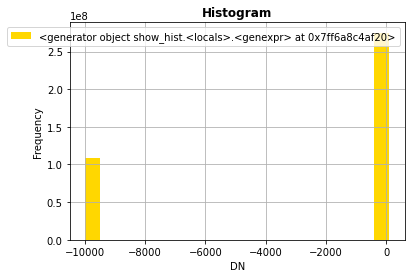

In [40]:
rasterio.plot.show_hist(band2, bins=20)

---

## GeoPy

In [41]:
geopy.geocoders.ArcGIS()

In [42]:
geolocator = Nominatim(user_agent="ArcGIS")
location = geolocator.geocode("175 5th Avenue NYC")
print(location.address)

Flatiron Building, 175, 5th Avenue, Manhattan Community Board 5, Manhattan, New York, 10010, United States


In [43]:
print((location.latitude, location.longitude))

(40.741059199999995, -73.98964162240998)


In [44]:
location = geolocator.geocode("Place Saint-Lambert 17, 1020 Bruxelles")

In [45]:
print(location.address)

17, Place Saint-Lambert - Sint-Lambertusplein, Heysel - Heizel, Laeken - Laken, Ville de Bruxelles - Stad Brussel, Brussel-Hoofdstad - Bruxelles-Capitale, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, 1020, België / Belgique / Belgien


In [46]:
print(location.latitude, location.longitude)

50.890366 4.343493783022129


---

## ArcGIS

In [40]:
print("ArcGIS Online as anonymous user")
gis = GIS()
print("Logged in as anonymous user to " + gis.properties.portalName)

ArcGIS Online as anonymous user
Logged in as anonymous user to ArcGIS Online


---

## Functions

In [13]:
def address_to_location() -> float:
    geopy.geocoders.ArcGIS()
    geolocator = Nominatim(user_agent="ArcGIS")
    address = input("Insert your address here: ")
    location = geolocator.geocode(f"{address}")
    latitude = location.latitude
    longitude = location.longitude
    return longitude, latitude


    #proj = pyproj.Proj(proj='utm', zone=31, ellps='epsg:31370', preserve_units=False)
    #crs_proj = proj(longitude, latitude)
    #return proj(longitude, latitude, inverse=True)

In [14]:
def location_to_crs(x: float, y: float) -> int:
    inProj = Proj('epsg:4326')
    outProj = Proj('epsg:31370')
    x2,y2 = transform(inProj, outProj, y, x)
    return(int(x2),int(y2))

In [38]:
location_to_crs(4.3818382, 50.8428062)

/var/folders/ch/wk0d_9_x76q3n77pfj4jqnkr0000gn/T/ipykernel_2562/296007633.py:4: DeprecationWarning:

This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1



(150921, 170266)

In [37]:
address_to_location()

Insert your address here: Schuman, Brussels


(4.3818382, 50.8428062)

In [40]:
import plotly
import plotly.graph_objects as go


def tiff_finder(x=150921, y=170266):
    paths = Path("./Data").glob("**/*.tif")
    loc = np.zeros((200, 200))
    for path in paths:
        with rasterio.open(path) as fd:
            if fd.bounds.left <= x <= fd.bounds.right:
                if fd.bounds.bottom <= y <= fd.bounds.top:
                    print(f"File source is {path}")
                    radius = 100
                    left, bottom, right, top = (
                        x - radius,
                        y - radius,
                        x + radius,
                        y + radius,
                    )
                    crop = fd.read(
                        1,
                        window=rasterio.windows.from_bounds(
                            left, bottom, right, top, fd.transform
                        ),
                    )
                    loc += crop
    fig = go.Figure(data=[go.Surface(z=loc)])
    fig.show()

In [ ]:
shape = geopandas.read_file("./Data/DHMVIIDTMRAS1m_k15/DHMVII_vdc_k15")

In [39]:
def shape_finder(x=150921, y=170266):
    paths = Path("./Data").glob("**/*.shp")
    for path in paths:
        bbox = bbox
        with geopandas.read_file(path, bbox=bbox) as sf:
            if 

SyntaxError: invalid syntax (1780108741.py, line 6)

In [134]:
dataset.transform

Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)

In [41]:
tiff_finder()

File source is Data/DHMVIIDSMRAS1m_k31/GeoTIFF/DHMVIIDSMRAS1m_k31.tif
File source is Data/DHMVIIDTMRAS1m_k31/GeoTIFF/DHMVIIDTMRAS1m_k31.tif


---

## Tkinter

In [3]:
from tkinter import *
from tkinter import ttk

In [9]:
btn = Button()
print(btn.configure().keys())

dict_keys(['activebackground', 'activeforeground', 'anchor', 'background', 'bd', 'bg', 'bitmap', 'borderwidth', 'command', 'compound', 'cursor', 'default', 'disabledforeground', 'fg', 'font', 'foreground', 'height', 'highlightbackground', 'highlightcolor', 'highlightthickness', 'image', 'justify', 'overrelief', 'padx', 'pady', 'relief', 'repeatdelay', 'repeatinterval', 'state', 'takefocus', 'text', 'textvariable', 'underline', 'width', 'wraplength'])


In [10]:
ent = Entry()
print(ent.configure().keys())

dict_keys(['background', 'bd', 'bg', 'borderwidth', 'cursor', 'disabledbackground', 'disabledforeground', 'exportselection', 'fg', 'font', 'foreground', 'highlightbackground', 'highlightcolor', 'highlightthickness', 'insertbackground', 'insertborderwidth', 'insertofftime', 'insertontime', 'insertwidth', 'invalidcommand', 'invcmd', 'justify', 'readonlybackground', 'relief', 'selectbackground', 'selectborderwidth', 'selectforeground', 'show', 'state', 'takefocus', 'textvariable', 'validate', 'validatecommand', 'vcmd', 'width', 'xscrollcommand'])


In [11]:
frm = ttk.Frame()
print(frm.configure().keys())

dict_keys(['borderwidth', 'padding', 'relief', 'width', 'height', 'takefocus', 'cursor', 'style', 'class'])


In [12]:
lbl = Label()
print(lbl.configure().keys())

dict_keys(['activebackground', 'activeforeground', 'anchor', 'background', 'bd', 'bg', 'bitmap', 'borderwidth', 'compound', 'cursor', 'disabledforeground', 'fg', 'font', 'foreground', 'height', 'highlightbackground', 'highlightcolor', 'highlightthickness', 'image', 'justify', 'padx', 'pady', 'relief', 'state', 'takefocus', 'text', 'textvariable', 'underline', 'width', 'wraplength'])


---

## Exploring Cadastral Data

In [1]:
import pandas as pd

In [7]:
cadastre = pd.read_csv("Data/Cadastral_plan/DivisionWideLandOccupation_20210101.csv", sep=";")

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
cadastre.head()

,NISCode,NameFre,NameDut,NameGer,ParcelNature,ParcelsNumber,TaxableParcelsArea,TaxExemptParcelsArea,TotalParcelsArea,ParcelsAreaP25,...,ParcelsAreaP75,ParcelsAreaSD,ProportionArea,TaxableCadastralIncome,TaxExemptCadastralIncome,TotalCadastralIncome,CadastralIncomeP25,CadastralIncomeP50,CadastralIncomeP75,CadastralIncomeSD
0,11001,AARTSELAAR 1 AFD,AARTSELAAR 1 AFD,AARTSELAAR 1 AFD,1,184,965215,45967,1011182,1232.0,...,7139.5,6226.133503,186.507053,4797.0,235.0,5032.0,6.0,19.0,34.5,35.983887
1,11001,AARTSELAAR 1 AFD,AARTSELAAR 1 AFD,AARTSELAAR 1 AFD,2,132,767372,0,767372,1182.0,...,7552.5,6371.060014,141.537617,3560.0,0.0,3560.0,5.0,18.0,37.5,30.725810
2,11001,AARTSELAAR 1 AFD,AARTSELAAR 1 AFD,AARTSELAAR 1 AFD,3,2,15810,0,15810,7218.0,...,8592.0,971.564717,2.916069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11001,AARTSELAAR 1 AFD,AARTSELAAR 1 AFD,AARTSELAAR 1 AFD,4,69,31163,28967,60130,86.0,...,781.0,1749.919255,11.090653,205.0,227.0,432.0,0.0,2.0,5.0,14.155286
4,11001,AARTSELAAR 1 AFD,AARTSELAAR 1 AFD,AARTSELAAR 1 AFD,5,12,43585,0,43585,689.5,...,4420.0,4562.915744,8.039018,243.0,0.0,243.0,3.5,11.0,23.5,26.622359


In [9]:
cadastre.columns

Index(['NISCode', 'NameFre', 'NameDut', 'NameGer', 'ParcelNature',
       'ParcelsNumber', 'TaxableParcelsArea', 'TaxExemptParcelsArea',
       'TotalParcelsArea', 'ParcelsAreaP25', 'ParcelsAreaP50',
       'ParcelsAreaP75', 'ParcelsAreaSD', 'ProportionArea',
       'TaxableCadastralIncome', 'TaxExemptCadastralIncome',
       'TotalCadastralIncome', 'CadastralIncomeP25', 'CadastralIncomeP50',
       'CadastralIncomeP75', 'CadastralIncomeSD'],
      dtype='object')

In [10]:
len(cadastre)

837665